In [1]:
import numpy as np

node_load_mean_mean = 50
node_load_mean_var = 10
node_load_iid_var = 5
node_load_ar1_theat = 0.9

# 生成符合平均值为 λ^-1 的指数分布的随机数
lambda_value = 1  # 设置 λ 值
n_samples = 1000  # 生成的样本数
load = np.random.normal(50, 10, n_samples = n_samples)
latency = np.random.exponential(scale=1/lambda_value, size=n_samples)


In [2]:
# 设置 AR(1) 系数 φ
phi = 0.8

# 初始化 AR(1) 模型的序列
ar1_series = np.zeros(n_samples)
ar1_series[0] = latency[0]  # 初始值

# 生成 AR(1) 序列
for t in range(1, n_samples):
    ar1_series[t] = phi * ar1_series[t-1] + latency[t]


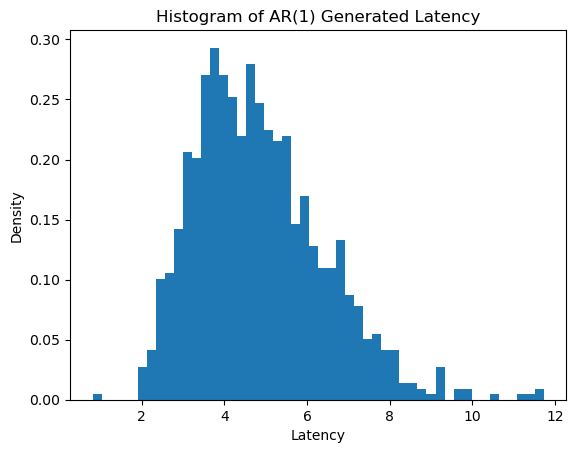

In [3]:
import matplotlib.pyplot as plt

plt.hist(ar1_series, bins=50, density=True)
plt.title("Histogram of AR(1) Generated Latency")
plt.xlabel("Latency")
plt.ylabel("Density")
plt.show()


In [5]:
import numpy as np

# 设定指数分布的均值
mean_latency = 100

# 生成1000个符合指数分布的随机数
latency_data = np.random.exponential(mean_latency, 1000)

# 计算生成数据的均值
calculated_mean = np.mean(latency_data)

print(f"Generated mean: {calculated_mean}")


Generated mean: 103.05396006685037


In [ ]:
def generate_mean(mean_mean, mean_var, T_test):

In [ ]:
    def _generate_means(self) -> np.ndarray:
        """
        生成节点的平均负载数据。
        
        :return: 包含节点平均负载的 numpy 数组
        """
        return np.random.normal(self.node_load_mean_mean, self.node_load_mean_var, size=(self.N,))

    def _generate_iid_data(self) -> tuple[np.ndarray, np.ndarray]:
        """
        生成 IID 数据。

        :return: 生成的 IID 数据和每个节点的均值
        """
        loads = np.array([
            np.random.normal(
                loc=self.means_loads[i],
                scale=self.node_load_iid_var,
                size=self.T_train_val + self.T_test
            ) for i in range(self.N)
        ])
        return loads, np.mean(loads, axis=1)

    def _generate_ar1_data(self) -> tuple[np.ndarray, np.ndarray]:
        """
        生成 AR(1) 数据。

        :return: 生成的 AR(1) 数据和每个节点的均值
        """
        loads = np.zeros((self.N, self.T_train_val + self.T_test))

        def generate_ar1(mean_node: float) -> np.ndarray:
            ar1 = torch.zeros(self.T_train_val + self.T_test)
            ar1[0] = mean_node
            for t in range(1, self.T_train_val + self.T_test):
                ar1[t] = (
                        self.node_load_ar1_theta * ar1[t - 1] +
                        (1 - self.node_load_ar1_theta) * mean_node +
                        np.random.normal(0, 1)
                )
            return ar1.numpy()

        for i in range(self.N):
            loads[i] = generate_ar1(self.means_loads[i])

        return loads, np.mean(loads, axis=1)

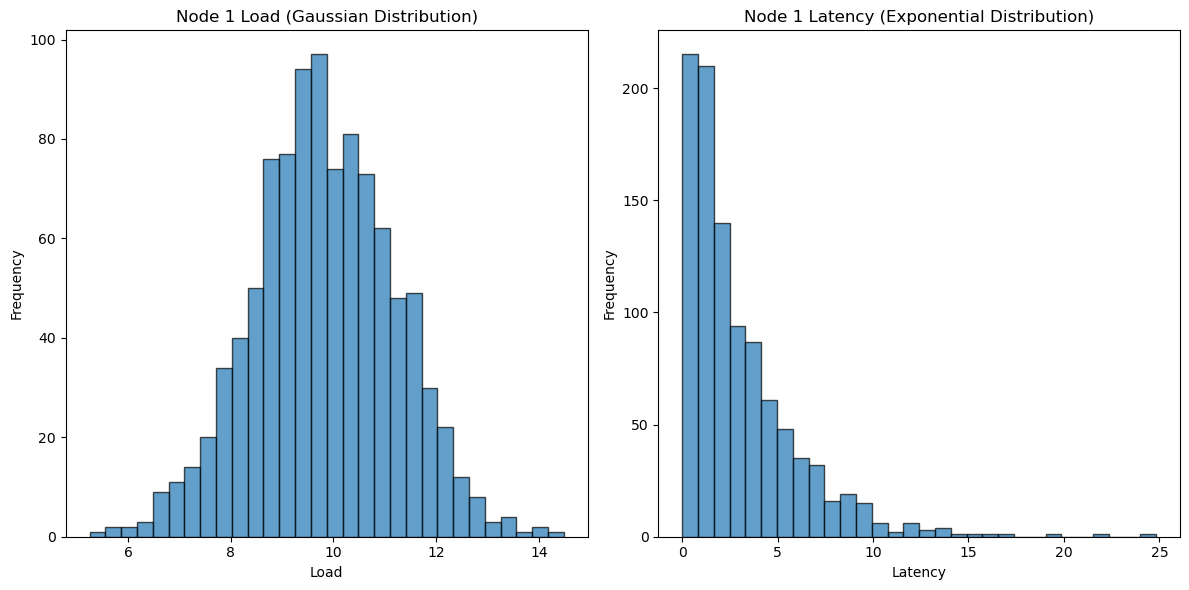

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
global_load_mean = 10  # 全局负载均值
global_load_variance = 2  # 全局负载方差
global_latency_mean = 5  # 全局延迟均值

N = 10  # 节点数量
num_samples = 1000  # 每个节点的样本数量

# 为每个节点生成load和latency的均值
load_means = np.random.normal(global_load_mean, np.sqrt(global_load_variance), N)
latency_means = np.random.normal(global_latency_mean, np.sqrt(global_load_variance), N)

# 初始化存储load和latency数据的数组
all_load_data = np.zeros((N, num_samples))
all_latency_data = np.zeros((N, num_samples))

# 为每个节点生成负载和延迟数据
for i in range(N):
    all_load_data[i] = np.random.normal(load_means[i], np.sqrt(global_load_variance), num_samples)
    all_latency_data[i] = np.random.exponential(latency_means[i], num_samples)

# 可视化第一个节点的负载和延迟数据
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(all_load_data[0], bins=30, edgecolor='black', alpha=0.7)
plt.title(f'Node 1 Load (Gaussian Distribution)')
plt.xlabel('Load')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(all_latency_data[0], bins=30, edgecolor='black', alpha=0.7)
plt.title(f'Node 1 Latency (Exponential Distribution)')
plt.xlabel('Latency')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


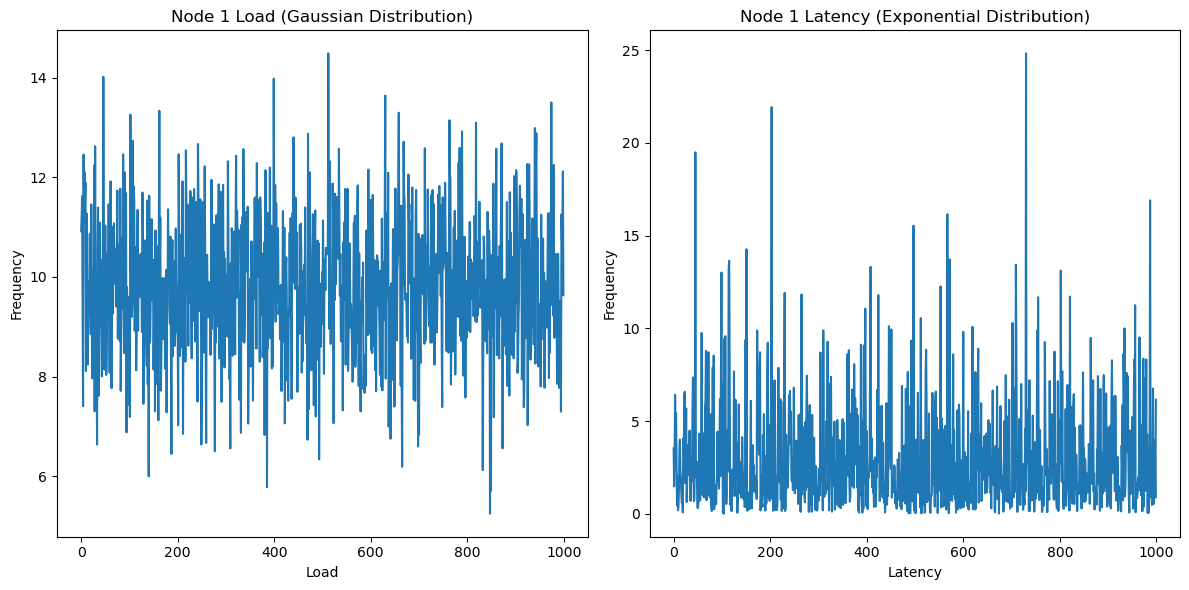

In [7]:
# 可视化第一个节点的负载和延迟数据
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(all_load_data[0])
# plt.hist(all_load_data[0], bins=30, edgecolor='black', alpha=0.7)
plt.title(f'Node 1 Load (Gaussian Distribution)')
plt.xlabel('Load')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(all_latency_data[0])
# plt.hist(all_latency_data[0], bins=30, edgecolor='black', alpha=0.7)
plt.title(f'Node 1 Latency (Exponential Distribution)')
plt.xlabel('Latency')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

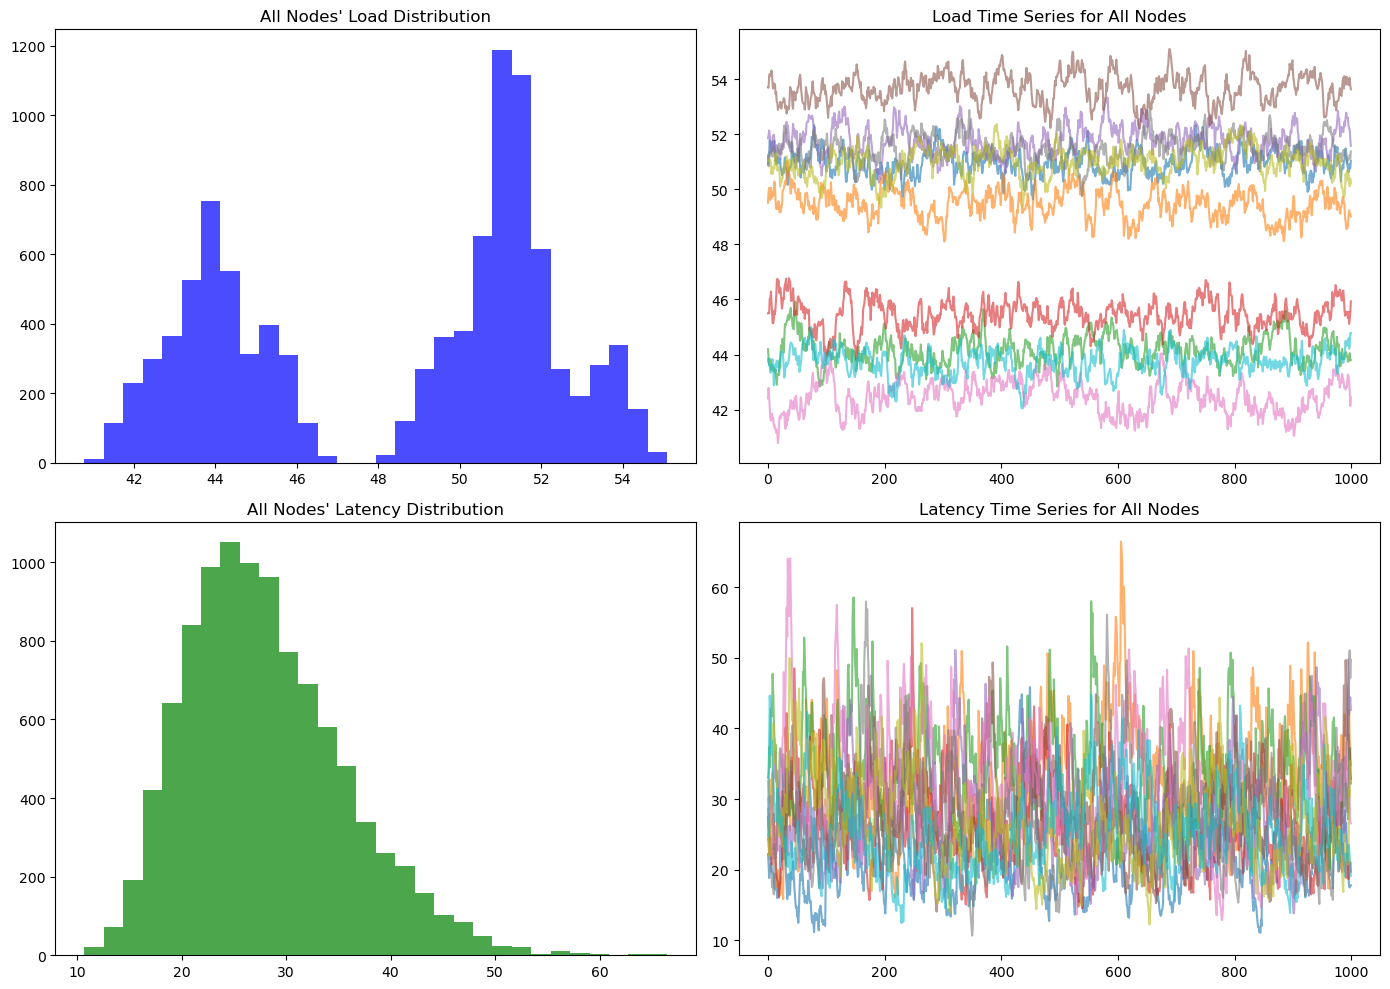

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
N = 10  # 节点数
T = 1000  # 每个节点的数据点数

load_data_params = {
    'node_load_mean_mean': 50.0,
    'node_load_mean_var': 10.0,
    'node_load_iid_var': 5.0,
    'node_load_ar1_theta': 0.9
}

latency_params = {
    'node_latency_mean_mean': 30.0,
    'node_latency_mean_var': 10.0,
    'node_latency_ar1_theta': 0.9
}

# 生成N个节点的load和latency的mean值
node_load_means = np.random.normal(load_data_params['node_load_mean_mean'], np.sqrt(load_data_params['node_load_mean_var']), N)
node_latency_means = np.random.normal(latency_params['node_latency_mean_mean'], np.sqrt(latency_params['node_latency_mean_var']), N)

# 初始化保存load和latency数据的矩阵
load_data = np.zeros((N, T))
latency_data = np.zeros((N, T))

# 生成load和latency的iid数据和AR1数据
for i in range(N):
    # 生成load的iid数据
    load_iid = np.random.normal(node_load_means[i], np.sqrt(load_data_params['node_load_iid_var']), T)
    load_ar1 = np.zeros(T)
    load_ar1[0] = node_load_means[i]
    for t in range(1, T):
        load_ar1[t] = load_data_params['node_load_ar1_theta'] * load_ar1[t-1] + (1 - load_data_params['node_load_ar1_theta']) * load_iid[t]

    load_data[i, :] = load_ar1

    # 生成latency的iid数据
    latency_iid = np.random.exponential(node_latency_means[i], T)
    latency_ar1 = np.zeros(T)
    latency_ar1[0] = node_latency_means[i]
    for t in range(1, T):
        latency_ar1[t] = latency_params['node_latency_ar1_theta'] * latency_ar1[t-1] + (1 - latency_params['node_latency_ar1_theta']) * latency_iid[t]

    latency_data[i, :] = latency_ar1

# 绘制图一
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 所有节点的load的正太分布图
all_loads = load_data.flatten()
axs[0, 0].hist(all_loads, bins=30, color='blue', alpha=0.7)
axs[0, 0].set_title("All Nodes' Load Distribution")

# 所有节点的load的1000次时序值折线图
axs[0, 1].plot(load_data.T, alpha=0.6)
axs[0, 1].set_title("Load Time Series for All Nodes")

# 所有节点的latency的指数分布图
all_latencies = latency_data.flatten()
axs[1, 0].hist(all_latencies, bins=30, color='green', alpha=0.7)
axs[1, 0].set_title("All Nodes' Latency Distribution")

# 所有节点的latency的1000次时序值折线图
axs[1, 1].plot(latency_data.T, alpha=0.6)
axs[1, 1].set_title("Latency Time Series for All Nodes")

plt.tight_layout()
plt.show()

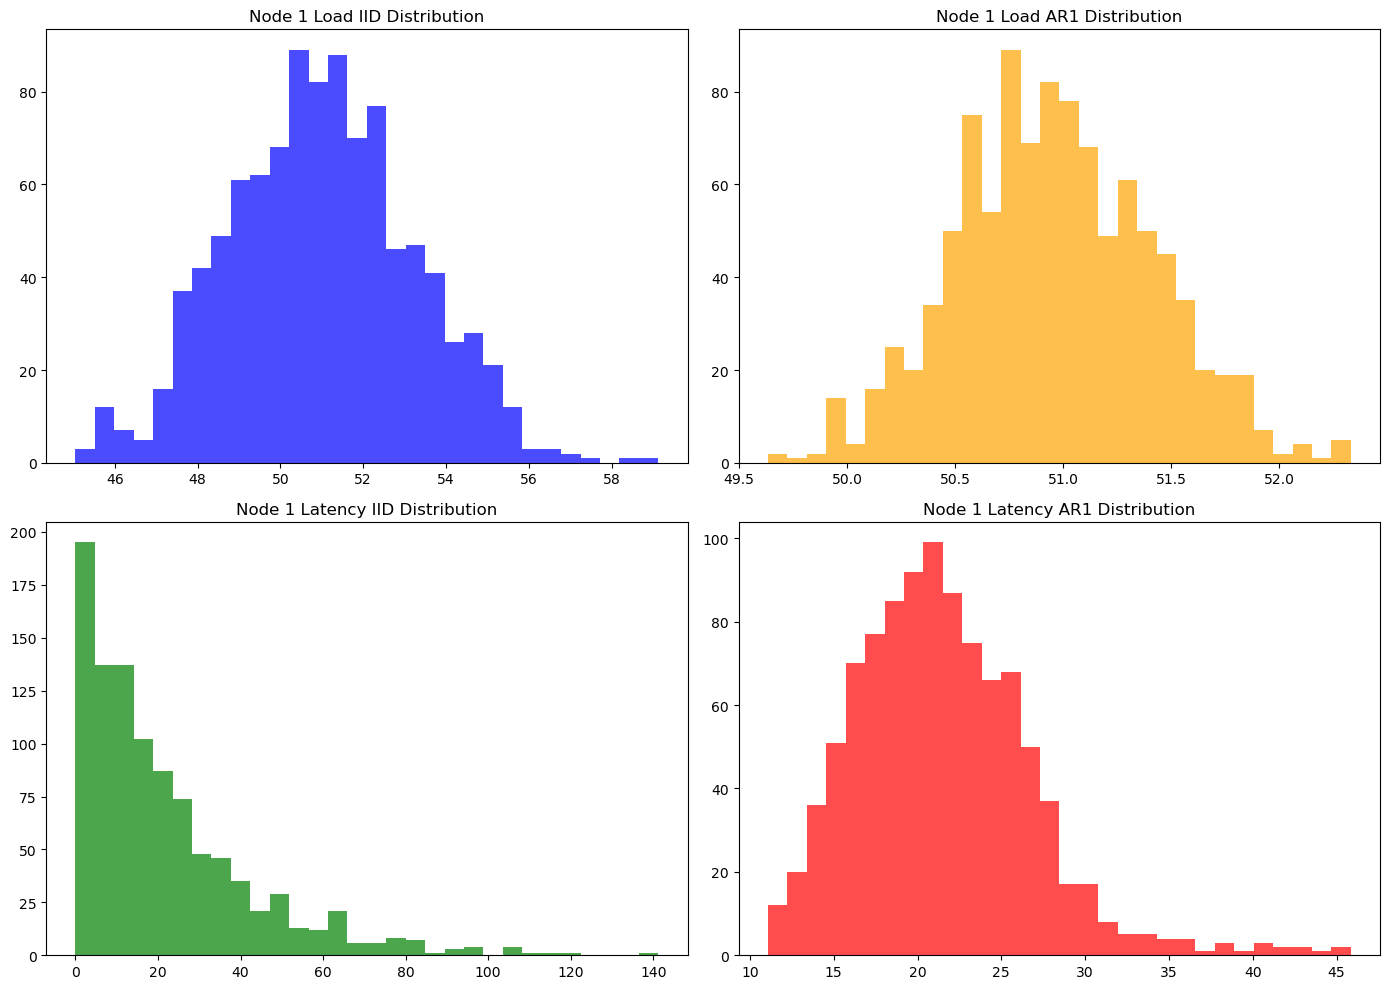

In [2]:
# 绘制图二
def plot_individual_node(i):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    
    # 第i个节点的load的iid数据的直方图
    load_iid = np.random.normal(node_load_means[i], np.sqrt(load_data_params['node_load_iid_var']), T)
    axs[0, 0].hist(load_iid, bins=30, color='blue', alpha=0.7)
    axs[0, 0].set_title(f"Node {i+1} Load IID Distribution")
    
    # 第i个节点的load的ar1数据的直方图
    axs[0, 1].hist(load_data[i], bins=30, color='orange', alpha=0.7)
    axs[0, 1].set_title(f"Node {i+1} Load AR1 Distribution")
    
    # 第i个节点的latency的iid数据的直方图
    latency_iid = np.random.exponential(node_latency_means[i], T)
    axs[1, 0].hist(latency_iid, bins=30, color='green', alpha=0.7)
    axs[1, 0].set_title(f"Node {i+1} Latency IID Distribution")
    
    # 第i个节点的latency的ar1数据的直方图
    axs[1, 1].hist(latency_data[i], bins=30, color='red', alpha=0.7)
    axs[1, 1].set_title(f"Node {i+1} Latency AR1 Distribution")
    
    plt.tight_layout()
    plt.show()

# 绘制第一个节点的数据
plot_individual_node(0)
